In [1]:
# needed imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from sklearn.mixture import GMM
import warnings
warnings.filterwarnings("ignore")

# Lecture de l'audio et affichage de sa durée

In [2]:
echantillon, audio = wavfile.read('audio.wav')
audio = audio.astype(float)
print(str(float(len(audio))/16000)+' secondes')

3596.6000625 secondes


# Détermination de la fenêtre et du pas pour découpage de l'audio

In [34]:
fenetre = 0.030
pas = 0.010
print('Nombre d\'énergies que l\'on va extraires: '+str(len(audio)/int(pas*echantillon)))
print('Nombre echantillons pour 30ms: '+str(int(fenetre*echantillon)))
print('Nombre echantillons pour 10ms: '+str(int(pas*echantillon)))

Nombre d'énergies que l'on va extraires: 359660
Nombre echantillons pour 30ms: 480
Nombre echantillons pour 10ms: 160


# Calcul de l'énergie

359661


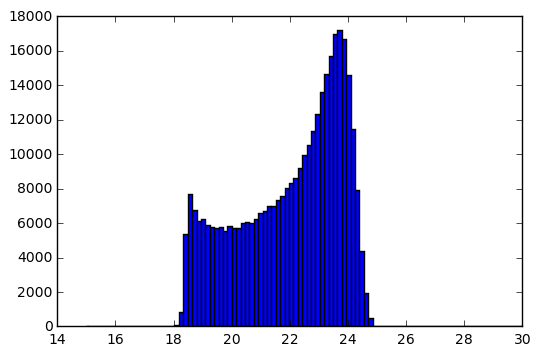

In [35]:
energies = []
for i in range(0,len(audio),160):
    energies.append(np.log(np.sum(audio[i:i+480]**2)))
print(len(energies))
h = plt.hist(energies,np.linspace(15,30,100))

# Apprendre un modèle de mélanges gaussiens

In [44]:
gmm = GMM(n_components=3, n_iter=10, verbose=10)
energies = np.array(energies).reshape(len(energies),1)
gmm.fit(energies)

Expectation-maximization algorithm started.
Initialization 1
	Means have been initialized.
	Weights have been initialized.
	Covariance matrices have been initialized.
	EM iteration 1
		EM iteration 1 took 0.11375s
	EM iteration 2
		Change: 0.169349924093
		EM iteration 2 took 0.10958s
	EM iteration 3
		Change: 0.0351545574253
		EM iteration 3 took 0.10372s
	EM iteration 4
		Change: 0.0242165507154
		EM iteration 4 took 0.10599s
	EM iteration 5
		Change: 0.0129329582357
		EM iteration 5 took 0.10571s
	EM iteration 6
		Change: 0.00646328644391
		EM iteration 6 took 0.10581s
	EM iteration 7
		Change: 0.00392522199941
		EM iteration 7 took 0.10676s
	EM iteration 8
		Change: 0.00307795650004
		EM iteration 8 took 0.10589s
	EM iteration 9
		Change: 0.00292463698503
		EM iteration 9 took 0.10711s
	EM iteration 10
		Change: 0.00307969682492
		EM iteration 10 took 0.10663s
	Better parameters were found.
	Initialization 1 took 3.90663s


GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=10, params='wmc', random_state=None,
  tol=0.001, verbose=10)

### Les gaussiennes sont en 1 dimension

### Le modèle est initialisé avec pour chaque gaussienne une moyenne et une variance

### La valeur "change" correspond à la vraissemblance du modèle sur les données d'apprentissage, on remarque qu'il converge en 7 itération à une valeur de 0.003 

### Pour une matrice de covariance de N*N dimensions la variance est un vecteur à N dimensions (correspondants aux valeurs de la diagonale sur la matrice de covariance). L'algorithme EM utilise seulement la variance de la matrice de covariance

In [39]:
print(type(gmm))

<class 'sklearn.mixture.gmm.GMM'>


In [26]:
m1, m2, m3 = gmm.means_ # moyennes
e1, e2, e3 = np.sqrt(gmm.covars_) # ecarts-types

(array([ 0.80848225]), array([ 0.89915641]), array([ 0.89915641]))


### On voit sur l'histogramme ci-dessous que les individus sont dans une région ou la densité de probabilité est forte donc il est vraissemblable que le modèle décrit l'échantillon

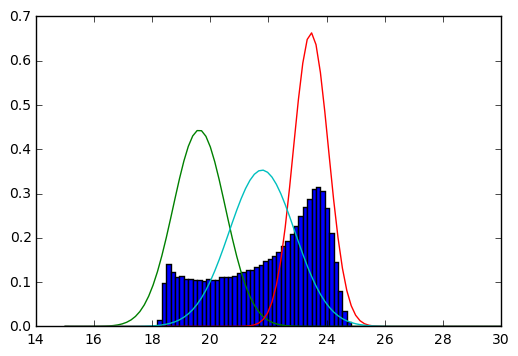

In [31]:
import matplotlib.mlab as mlab
n, bins, patches = plt.hist(energies,np.linspace(15,30,100),normed=True)
plt.plot(bins, mlab.normpdf(bins,m1,e1))
plt.plot(bins, mlab.normpdf(bins,m2,e2))
plt.plot(bins, mlab.normpdf(bins,m3,e3))
plt.show()

# Détection de parole et de silence

In [51]:
val = np.median(gmm.means_) - 2*np.median(np.sqrt(gmm.covars_))
parole = []
silence = []

for i in range(0,len(audio)-160,160):
    if np.log(np.sum(audio[i:i+480]**2)) > val:
        for j in range(i,i+160):
            parole.append(audio[j])
    else:
        for j in range(i,160+i):
            silence.append(audio[j])

print(len(energies),type(energies))
print(len(parole),type(parole))
print(len(silence),type(silence))
print(len(audio),type(audio))

(359661, <type 'list'>)
(46827200, <type 'list'>)
(10718400, <type 'list'>)
(57545601, <type 'numpy.ndarray'>)


In [52]:
wavfile.write('parole.wav',echantillon,np.array(parole))
wavfile.write('silence.wav',echantillon,np.array(silence))

# GMM à deux gaussiennes

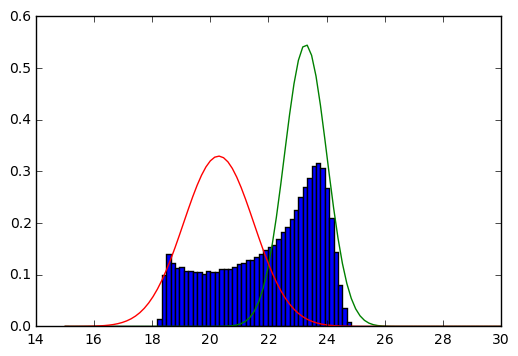

(359661, <type 'numpy.ndarray'>)
(47678880, <type 'list'>)
(9866720, <type 'list'>)
(57545601, <type 'numpy.ndarray'>)


In [54]:
gmm = GMM(n_components=2, n_iter=10)
energies = np.array(energies).reshape(len(energies),1)
gmm.fit(energies)

m1, m2 = gmm.means_ # moyennes
e1, e2 = np.sqrt(gmm.covars_) # ecarts-types

import matplotlib.mlab as mlab
n, bins, patches = plt.hist(energies,np.linspace(15,30,100),normed=True)
plt.plot(bins, mlab.normpdf(bins,m1,e1))
plt.plot(bins, mlab.normpdf(bins,m2,e2))
plt.show()

val = np.median(gmm.means_) - 2*np.median(np.sqrt(gmm.covars_))
parole = []
silence = []

for i in range(0,len(audio)-160,160):
    if np.log(np.sum(audio[i:i+480]**2)) > val:
        for j in range(i,i+160):
            parole.append(audio[j])
    else:
        for j in range(i,160+i):
            silence.append(audio[j])

print(len(energies),type(energies))
print(len(parole),type(parole))
print(len(silence),type(silence))
print(len(audio),type(audio))

wavfile.write('parole2.wav',echantillon,np.array(parole))
wavfile.write('silence2.wav',echantillon,np.array(silence))

# Modèles à 4, 8 puis 16 gaussiennes

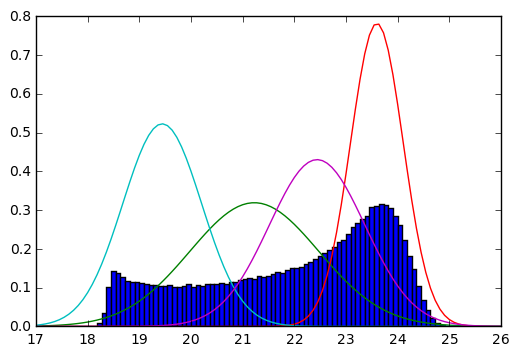

In [59]:
gmm = GMM(n_components=4, n_iter=10)
gmm.fit(energies)

n, bins, patches = plt.hist(energies,np.linspace(17,26,100),normed=True)
for i in range(4):
    plt.plot(bins, mlab.normpdf(bins, gmm.means_[i], np.sqrt(gmm.covars_[i])))

plt.show()

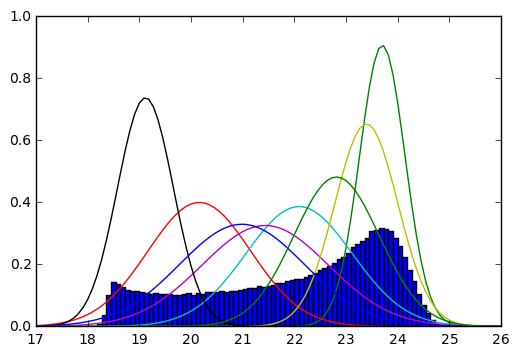

In [60]:
gmm = GMM(n_components=8, n_iter=10)
gmm.fit(energies)

n, bins, patches = plt.hist(energies,np.linspace(17,26,100),normed=True)
for i in range(8):
    plt.plot(bins, mlab.normpdf(bins, gmm.means_[i], np.sqrt(gmm.covars_[i])))

plt.show()

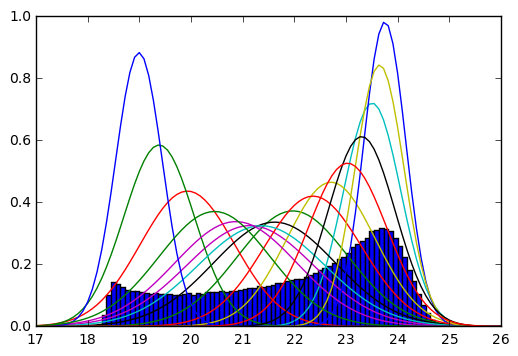

In [61]:
gmm = GMM(n_components=16, n_iter=10)
gmm.fit(energies)

n, bins, patches = plt.hist(energies,np.linspace(17,26,100),normed=True)
for i in range(16):
    plt.plot(bins, mlab.normpdf(bins, gmm.means_[i], np.sqrt(gmm.covars_[i])))

plt.show()

Supression de 10% des valeurs d'énergies les plus basses

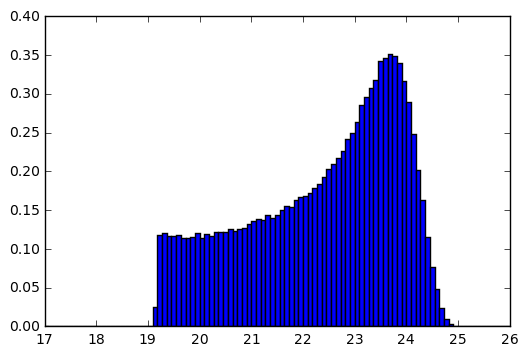

In [71]:
energies2 = energies.reshape(len(energies)).tolist()
for i in range(len(energies)/10):
    energies2.remove(min(energies2))
    
h = plt.hist(energies2,np.linspace(17,26,100),normed=True)
    

Debut de recherche sur le ZCR non concluant

359660


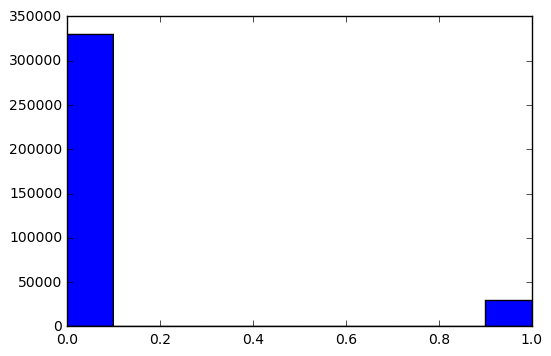

In [8]:
zcr = []
for i in range(1,len(audio),160):
    if np.all(audio[i-1:i-1+480]) * np.all(audio[i:i+480]) > 0:
        zcr.append(0)
    else:
        zcr.append(1)
        
print(len(zcr))
h = plt.hist(zcr)

In [12]:
gmm = GMM(n_components=2, n_iter=10)
gmm.fit(np.array(zcr).reshape(len(zcr),1))

m1, m2 = gmm.means_ # moyennes
e1, e2 = np.sqrt(gmm.covars_) # ecarts-types

val = np.median(gmm.means_) - 2*np.median(np.sqrt(gmm.covars_))
parole = []
silence = []

k = 0
for i in range(0,len(audio)-160,160):
    if zcr[k] < val:
        for j in range(i,i+160):
            parole.append(audio[j])
    else:
        for j in range(i,160+i):
            silence.append(audio[j])
    k+=1

wavfile.write('parole3.wav',echantillon,np.array(parole))
wavfile.write('silence3.wav',echantillon,np.array(silence))


In [55]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title(title)

    
n_samples = 300
e = np.array(energies)
z = np.array(zcr)
# Generate random sample, two components
X = np.concatenate((e,z)) # concatene energies et zcr
print(X)
#X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
 #         .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, 'Gaussian Mixture')

plt.show()

[ 24.41024312  24.13335287  23.61059591 ...,   0.           0.           0.        ]


MemoryError: 